## 作业要求

1. 分别读取4个城市的二手数据（bj.csv、sh.csv、gz.csv和sz.csv），将将其归档到同一个DataFrame中。
2. 计算车辆的使用年份和保值率，并在DataFrame新增对应的字段存储数据。
    1. 使用年份=当前时间-购买时间
    2. 保值率=二手车价格 / 新车价格
3. 绘制使用年份与保值率的散点图，观察并简单分析其分布特征。
4. 绘制行驶距离与保值率的散点图，观察并简单分析其分布特征。

In [1]:
# 导入包
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.linear_model import LinearRegression

## 一、读取数据

In [2]:
bj = pd.read_csv(r"bj.csv")
bj.head()

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,大众 宝来 2014款 1.6L 自动时尚型,一汽-大众,2014-08,3.82,自动,1.6L,8.0,13.0,北京,2014款,紧凑型,0,105马力,汽油,4523,1775,1467,NaN,前置前驱
1,福特 福睿斯 2015款 1.5L 自动时尚型,长安福特,2015-12,2.35,自动,1.5L,7.8,13.0,北京,2015款,紧凑型,0,113马力,汽油,4587,1825,1490,NaN,前置前驱
2,大众 速腾 2012款 1.6L 自动舒适型,一汽-大众,2012-05,6.67,自动,1.6L,7.0,16.4,北京,2012款,紧凑型,0,105马力,汽油,4644,1778,1482,NaN,前置前驱
3,奔驰C级 2011款 C 200 CGI 时尚型,北京奔驰,2013-01,11.83,自动,1.8T,15.0,42.1,北京,2011款,中型,0,184马力,汽油,4591,1770,1444,NaN,前置后驱
4,大众 帕萨特 2013款 2.0TSI DSG御尊版,上汽大众,2013-11,8.95,自动,2.0T,13.0,27.7,北京,2013款,中型,0,200马力,汽油,4870,1834,1472,NaN,前置前驱


In [3]:
sh = pd.read_csv(r"sh.csv")
sh.head()

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,本田 奥德赛 2015款 2.4L 智享版,广汽本田,2015-09,4.69,自动,2.4L,25.00,29.0,上海,2015款,MPV,0,186马力,汽油,4830,1805,1695,NaN,前置前驱
1,大众 途观 2013款 1.8TSI 自动两驱豪华型,上汽大众,2013-12,9.47,自动,1.8T,13.00,28.2,上海,2013款,紧凑型,1,160马力,汽油,4506,1809,1685,NaN,前置前驱
2,斯柯达 晶锐 2015款 1.6L 自动创行版,上汽斯柯达,2016-06,3.07,自动,1.6L,6.00,10.3,上海,2015款,小型,0,110马力,汽油,3993,1732,1487,NaN,前置前驱
3,奔驰E级 2011款 E 300 L 优雅型,北京奔驰,2012-02,2.17,自动,3.0L,21.00,64.7,上海,2011款,中大型,0,245马力,汽油,5012,1855,1464,NaN,前置后驱
4,本田 凌派 2013款 1.8L 手动舒适版,广汽本田,2014-07,7.47,手动,1.8L,6.38,12.5,上海,2013款,紧凑型,0,139马力,汽油,4650,1750,1505,NaN,前置前驱


In [4]:
gz = pd.read_csv(r"gz.csv")
gz.head()

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,别克 君威 2015款 1.6T 领先技术型,上汽通用别克,2016-10,2.60,自动,1.6T,12.00,20.6,广州,2015款,中型,0,184马力,汽油,4843,1856,1484,NaN,前置前驱
1,奔腾X80 2013款 2.0L 自动舒适型,一汽奔腾,2013-07,5.84,自动,2.0L,5.32,14.5,广州,2013款,紧凑型,1,147马力,汽油,4586,1820,1695,NaN,前置前驱
2,日产 轩逸 2012款 1.8XL CVT豪华版,东风日产,2014-05,5.82,自动,1.8L,8.50,16.3,广州,2012款,紧凑型,0,139马力,汽油,4610,1760,1495,NaN,前置前驱
3,丰田 雷凌 2014款 1.6G CVT精英版,广汽丰田,2015-11,4.47,自动,1.6L,8.50,13.5,广州,2014款,紧凑型,0,122马力,汽油,4630,1775,1480,NaN,前置前驱
4,日产 轩逸 2012款 经典 1.6XE 手动舒适版,东风日产,2014-08,9.48,手动,1.6L,5.50,10.8,广州,2012款,紧凑型,0,117马力,汽油,4665,1700,1505,NaN,前置前驱


In [5]:
sz = pd.read_csv(r"sz.csv")
sz.head()

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,传祺GS4 2015款 200T G-DCT豪华版,广汽乘用车,2015-07,5.79,自动,1.3T,8.0,14.8,深圳,2015款,紧凑型,1,137马力,汽油,4510,1852,1708,NaN,前置前驱
1,宝马X1 2018款 sDrive20Li 领先型,华晨宝马,2018-02,1.54,自动,2.0T,25.0,34.4,深圳,2018款,紧凑型,1,192马力,汽油,4565,1821,1624,NaN,前置前驱
2,长安CS75 2016款 1.5T 手动锋尚型,长安汽车,2016-12,2.95,手动,1.5T,6.6,11.1,深圳,2016款,紧凑型,1,170马力,汽油,4650,1850,1705,NaN,前置前驱
3,本田 缤智 2015款 1.5L CVT两驱舒适型,广汽本田,2016-09,2.77,自动,1.5L,11.0,14.8,深圳,2015款,小型,1,131马力,汽油,4294,1772,1605,NaN,前置前驱
4,本田 飞度 2014款 1.5L EXLI CVT领先型,广汽本田,2017-02,1.72,自动,1.5L,9.3,12.2,深圳,2014款,小型,0,131马力,汽油,4065,1695,1525,NaN,前置前驱


## 二、整理数据
### 2.1 数据拼接

In [6]:
# 简单拼接四张表
# 重置行索引
data = pd.concat([bj,sh,gz,sz]).reset_index()
# 删除buy_time为空的记录
data.dropna(subset=["buy_time"],inplace=True)
# 查看数据
data.head()

,index,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,0,大众 宝来 2014款 1.6L 自动时尚型,一汽-大众,2014-08,3.82,自动,1.6L,8.0,13.0,北京,2014款,紧凑型,0,105马力,汽油,4523,1775,1467,NaN,前置前驱
1,1,福特 福睿斯 2015款 1.5L 自动时尚型,长安福特,2015-12,2.35,自动,1.5L,7.8,13.0,北京,2015款,紧凑型,0,113马力,汽油,4587,1825,1490,NaN,前置前驱
2,2,大众 速腾 2012款 1.6L 自动舒适型,一汽-大众,2012-05,6.67,自动,1.6L,7.0,16.4,北京,2012款,紧凑型,0,105马力,汽油,4644,1778,1482,NaN,前置前驱
3,3,奔驰C级 2011款 C 200 CGI 时尚型,北京奔驰,2013-01,11.83,自动,1.8T,15.0,42.1,北京,2011款,中型,0,184马力,汽油,4591,1770,1444,NaN,前置后驱
4,4,大众 帕萨特 2013款 2.0TSI DSG御尊版,上汽大众,2013-11,8.95,自动,2.0T,13.0,27.7,北京,2013款,中型,0,200马力,汽油,4870,1834,1472,NaN,前置前驱


### 2.2 提取目标特征

In [7]:
# 提取要计算的数据
data4Cal = data[["buy_time","es_price","new_price","km"]]
data4Cal

,buy_time,es_price,new_price,km
0,2014-08,8.00,13.0,3.82
1,2015-12,7.80,13.0,2.35
2,2012-05,7.00,16.4,6.67
3,2013-01,15.00,42.1,11.83
4,2013-11,13.00,27.7,8.95
...,...,...,...,...
7022,2016-03,11.49,25.0,4.21
7023,2017-10,11.00,17.9,0.09
7024,2013-10,14.00,22.8,3.95
7025,2012-01,5.30,15.2,7.26


## 三、数据计算
### 3.1 计算使用年份

In [8]:
# 获取当前时间
now = datetime.now()
# 计算使用年份
data4Cal["used_years"]=data4Cal["buy_time"].apply(lambda x:(now-datetime.strptime(x, "%Y-%m")).days/30/12)
data4Cal

/var/folders/59/_lbpck214pqcv3v468n7dv6w0000gn/T/ipykernel_50658/4132151412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4Cal["used_years"]=data4Cal["buy_time"].apply(lambda x:(now-datetime.strptime(x, "%Y-%m")).days/30/12)


,buy_time,es_price,new_price,km,used_years
0,2014-08,8.00,13.0,3.82,8.063889
1,2015-12,7.80,13.0,2.35,6.711111
2,2012-05,7.00,16.4,6.67,10.347222
3,2013-01,15.00,42.1,11.83,9.666667
4,2013-11,13.00,27.7,8.95,8.822222
...,...,...,...,...,...
7022,2016-03,11.49,25.0,4.21,6.458333
7023,2017-10,11.00,17.9,0.09,4.850000
7024,2013-10,14.00,22.8,3.95,8.908333
7025,2012-01,5.30,15.2,7.26,10.683333


### 3.2 计算保值率

In [9]:
# 计算保值率
data4Cal["hedge_rate"]=data4Cal["es_price"]/data4Cal["new_price"]
data4Cal

/var/folders/59/_lbpck214pqcv3v468n7dv6w0000gn/T/ipykernel_50658/1978584203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4Cal["hedge_rate"]=data4Cal["es_price"]/data4Cal["new_price"]


,buy_time,es_price,new_price,km,used_years,hedge_rate
0,2014-08,8.00,13.0,3.82,8.063889,0.615385
1,2015-12,7.80,13.0,2.35,6.711111,0.600000
2,2012-05,7.00,16.4,6.67,10.347222,0.426829
3,2013-01,15.00,42.1,11.83,9.666667,0.356295
4,2013-11,13.00,27.7,8.95,8.822222,0.469314
...,...,...,...,...,...,...
7022,2016-03,11.49,25.0,4.21,6.458333,0.459600
7023,2017-10,11.00,17.9,0.09,4.850000,0.614525
7024,2013-10,14.00,22.8,3.95,8.908333,0.614035
7025,2012-01,5.30,15.2,7.26,10.683333,0.348684


## 四、绘制数据
### 4.1 使用年份与保值率的散点图
#### 4.1.1 直接绘制

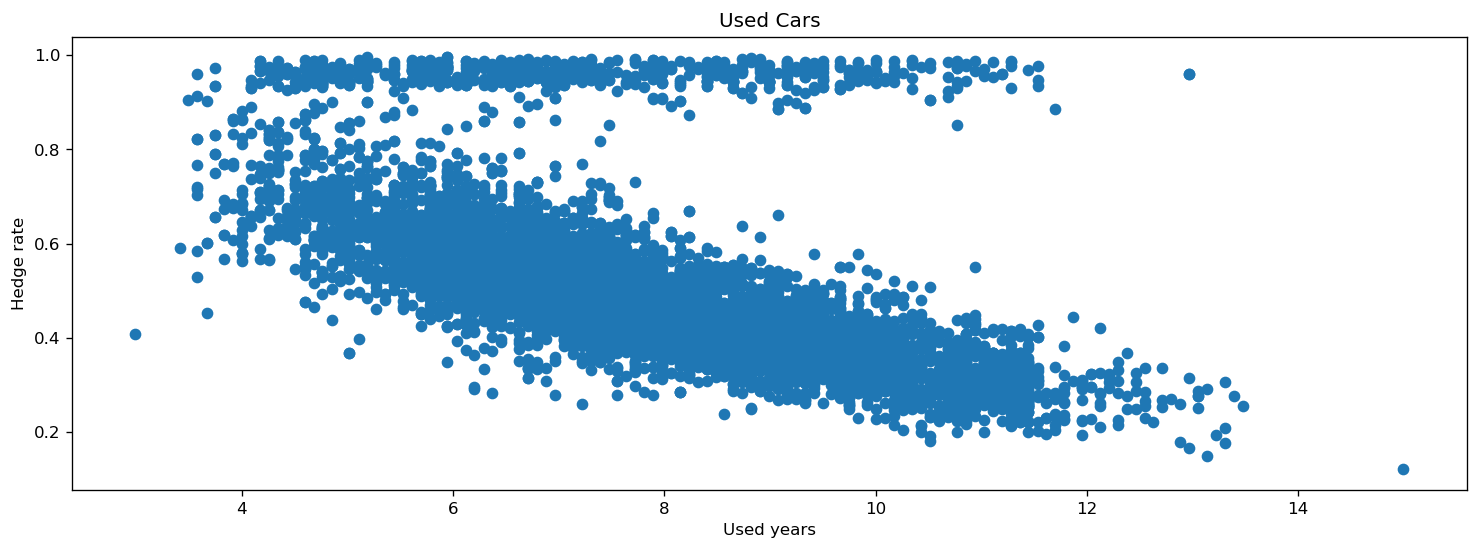

In [10]:
# 设置画板
plt.figure(figsize=(15,5),dpi=120)
# 设置绘图数据
    # 横坐标是使用年份
    # 纵坐标是保值率 
plt.scatter(data4Cal["used_years"],data4Cal["hedge_rate"])
# 设置回归曲线
# 设置图名
plt.title("Used Cars")
# 设置x轴标签
plt.xlabel("Used years")
# 设置y轴标签
plt.ylabel("Hedge rate")


# 绘图
plt.show()

#### 4.1.2 清理异常数据之后再绘制

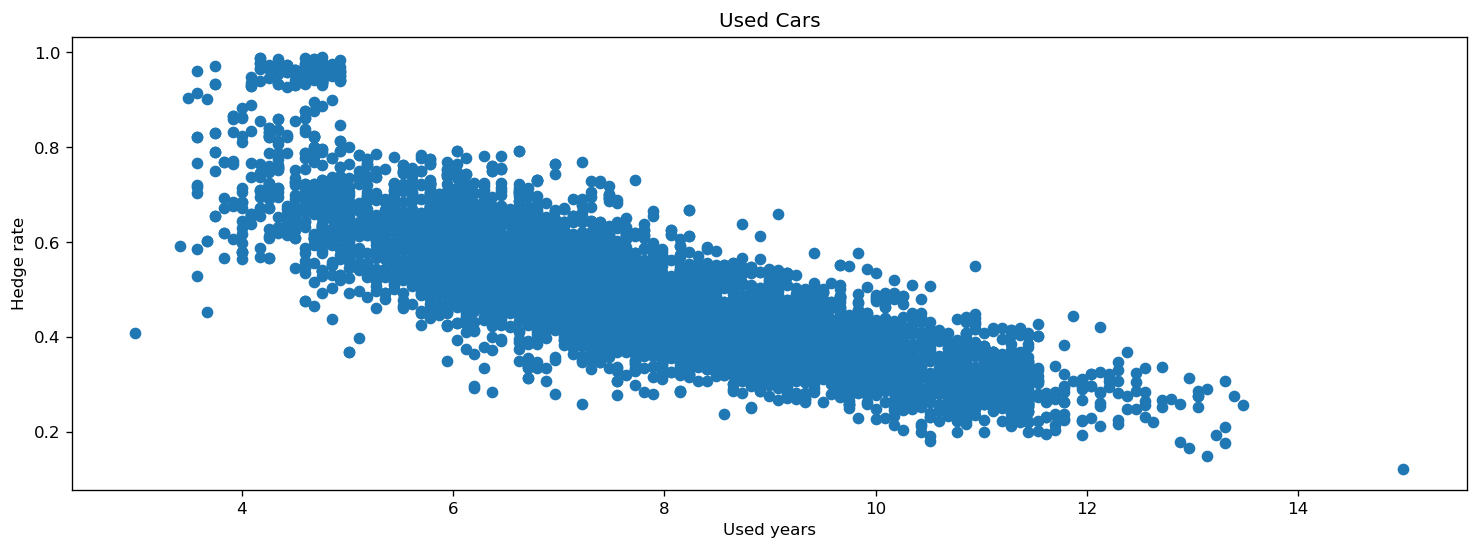

In [11]:
# 清理异常数据
    # 去掉使用年份超过5年，保值率大于0.8的二手车
    # 注意：清理的标准不一定准确，可自行调整
cleanedData=data4Cal[-((data4Cal["used_years"]>5) & (data4Cal["hedge_rate"]>0.8))]
# 设置画板
plt.figure(figsize=(15,5),dpi=120)
# 设置绘图数据
    # 横坐标是使用年份
    # 纵坐标是保值率 
plt.scatter(cleanedData["used_years"],cleanedData["hedge_rate"])
# 设置回归曲线
# 设置图名
plt.title("Used Cars")
# 设置x轴标签
plt.xlabel("Used years")
# 设置y轴标签
plt.ylabel("Hedge rate")


# 绘图
plt.show()

### 4.2 行驶里程与保值率的散点图
#### 4.2.1 直接绘制

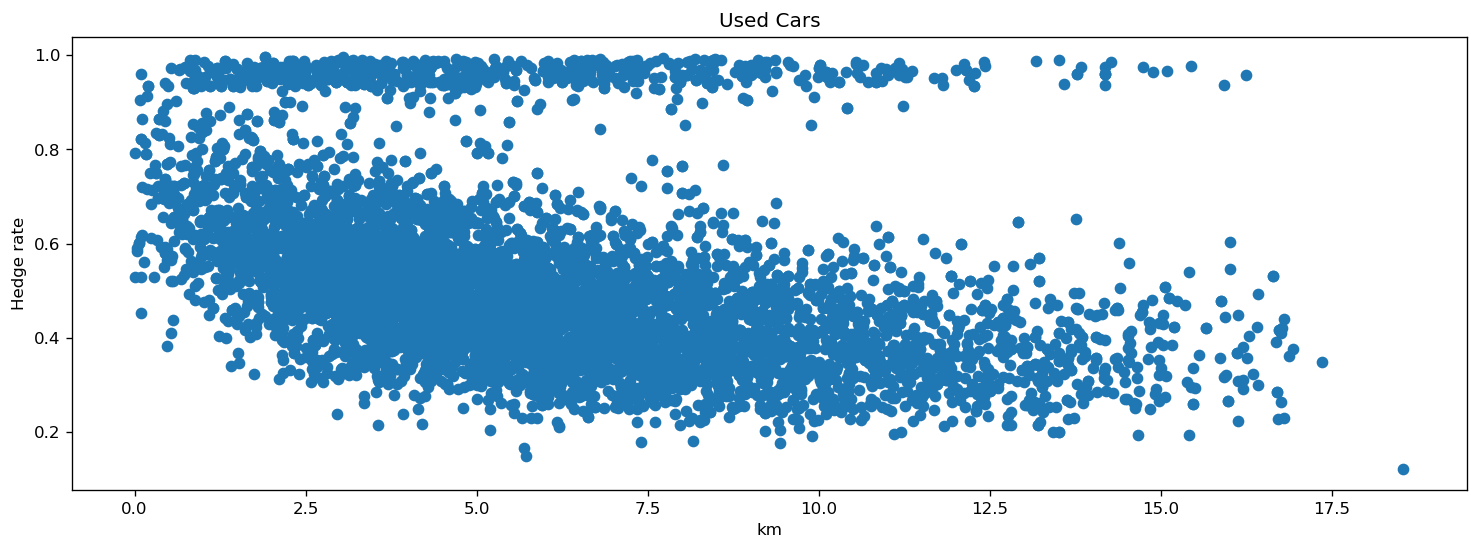

In [12]:
# 设置画板
plt.figure(figsize=(15,5),dpi=120)
# 设置绘图数据
    # 横坐标是使用年份
    # 纵坐标是保值率 
plt.scatter(data4Cal["km"],data4Cal["hedge_rate"])
# 设置回归曲线
# 设置图名
plt.title("Used Cars")
# 设置x轴标签
plt.xlabel("km")
# 设置y轴标签
plt.ylabel("Hedge rate")


# 绘图
plt.show()

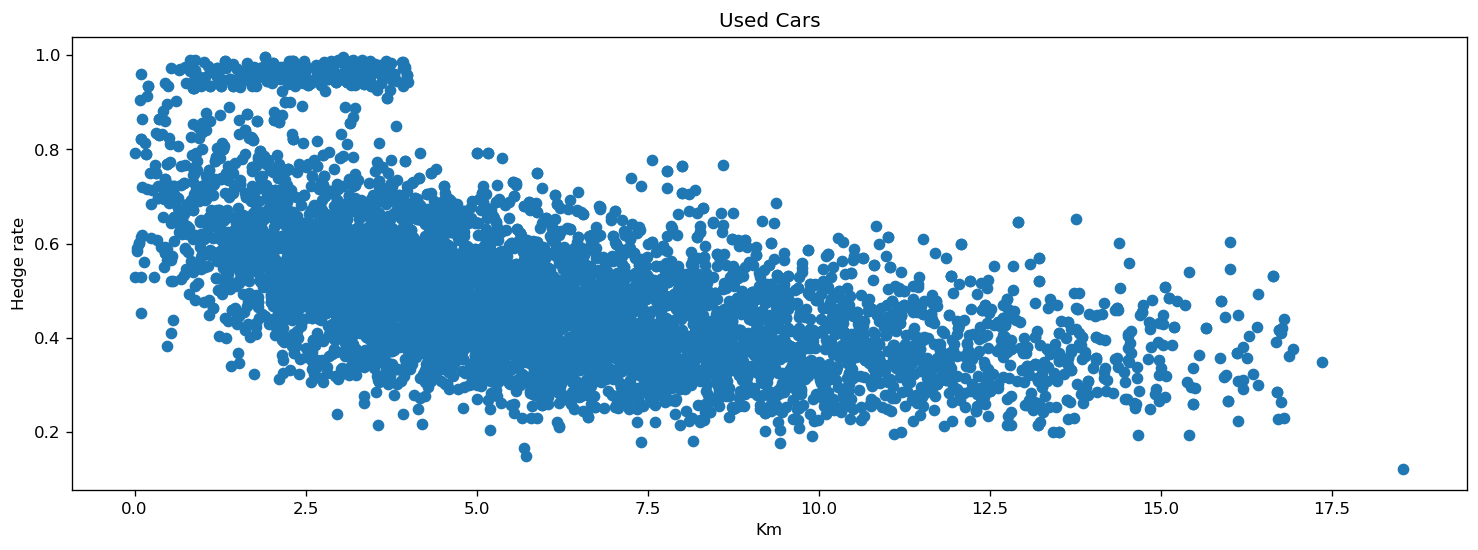

In [13]:
# 清理异常数据
    # 去掉行驶里程超过4万公里，保值率大于0.8的二手车
    # 注意：清理的标准不一定准确，可自行调整
cleanedData2=data4Cal[-((data4Cal["km"]>4) & (data4Cal["hedge_rate"]>0.8))]
# 设置画板
plt.figure(figsize=(15,5),dpi=120)
# 设置绘图数据
    # 横坐标是使用年份
    # 纵坐标是保值率 
plt.scatter(cleanedData2["km"],cleanedData2["hedge_rate"])
# 设置回归曲线
# 设置图名
plt.title("Used Cars")
# 设置x轴标签
plt.xlabel("Km")
# 设置y轴标签
plt.ylabel("Hedge rate")


# 绘图
plt.show()